In [1]:
import numpy as np
import pystan
from stan_utilities import plot_posteriors, plot_traces, posterior_stats

### MCMC

In [2]:
y_raw = [np.array([2603.77028549, 2665.292078  , 2251.261876  , 2510.15775133]),
 np.array([1558.72110143, 1728.68097843, 1865.72775535, 1413.52330867,
        1158.81381311, 1691.86795088]),
 np.array([1527.73185301, 1443.51857169, 1041.14137785])]

y = [np.round(yg).astype(int) for yg in y_raw]

In [3]:
y

[array([2604, 2665, 2251, 2510]),
 array([1559, 1729, 1866, 1414, 1159, 1692]),
 array([1528, 1444, 1041])]

In [4]:
N = sum([len(yg) for yg in y])

In [5]:
n = [len(yg) for yg in y]

In [6]:
G = len(y)

In [7]:
y_flat = np.concatenate(y)
labels_flat = np.concatenate([[g+1] * n[g] for g in range(G)])

In [8]:
print(list(zip(labels_flat, y_flat)))

[(1, 2604), (1, 2665), (1, 2251), (1, 2510), (2, 1559), (2, 1729), (2, 1866), (2, 1414), (2, 1159), (2, 1692), (3, 1528), (3, 1444), (3, 1041)]


In [11]:
model_code = """
data {
    int<lower=1> G;  // number of groups
    int<lower=1> N;  // total number of data points
    int<lower=1, upper=G> label[N];  // group labels
    real y[N];
}
parameters{
    real mu;
    real delta[G];  // group deviations
    real<lower=0> sigma2_delta;  // variance of group means
    real<lower=0> sigma2;  // within-group variance
}
model {
    target += - log(sigma2_delta) - log(sigma2);  // prior
    for (g in 1:G){
        target += normal_lpdf(delta[g] | 0, sqrt(sigma2_delta));
    }
    for (j in 1:N){
        target += normal_lpdf(y[j] | mu + delta[label[j]], sqrt(sigma2));
    }
}
"""
model = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a481e2a8436dc547b67bc7524654299d NOW.


In [12]:
data = {
    'G': G,
    'N': N,
    'label': labels_flat,
    'y': y_flat
}

In [13]:
fit = model.sampling(data, seed=123456, iter=20_000, thin=10)

In [15]:
fit

Inference for Stan model: anon_model_a481e2a8436dc547b67bc7524654299d.
4 chains, each with iter=20000; warmup=10000; thin=10; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu           1827.1   23.96 1048.6 403.04 1512.7 1804.5 2083.8 3193.8   1915    1.0
delta[0]     642.02   23.97 1054.9 -743.1 366.74 650.63 962.46 2109.1   1937    1.0
delta[1]     -248.0   24.08 1051.9  -1670 -499.3 -222.9  68.88 1175.6   1908    1.0
delta[2]     -459.5   24.07 1054.5  -1941 -722.1 -421.0 -143.8 920.68   1919    1.0
sigma2_delta  3.9e6   1.7e6  8.5e7  6.9e4  2.3e5  5.0e5  1.2e6  1.3e7   2460    1.0
sigma2        7.2e4  763.36  4.5e4  2.7e4  4.5e4  6.1e4  8.5e4  2.0e5   3432    1.0
lp__         -114.4    0.04   2.21 -119.7 -115.6 -114.0 -112.8 -111.4   3381    1.0

Samples were drawn using NUTS at Sun Apr 29 12:52:42 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and R

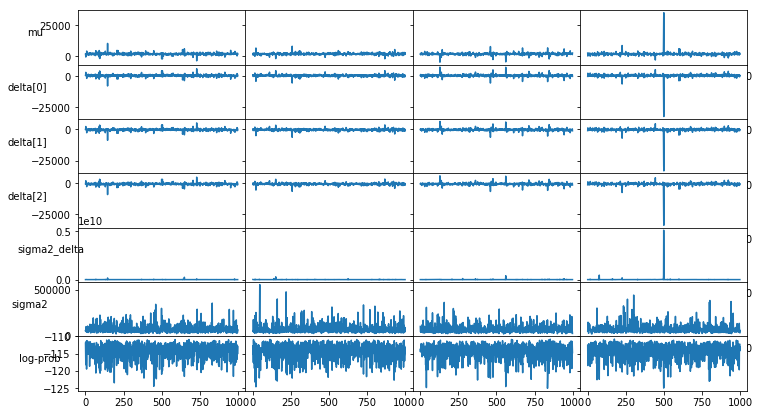

In [14]:
plot_traces(fit)

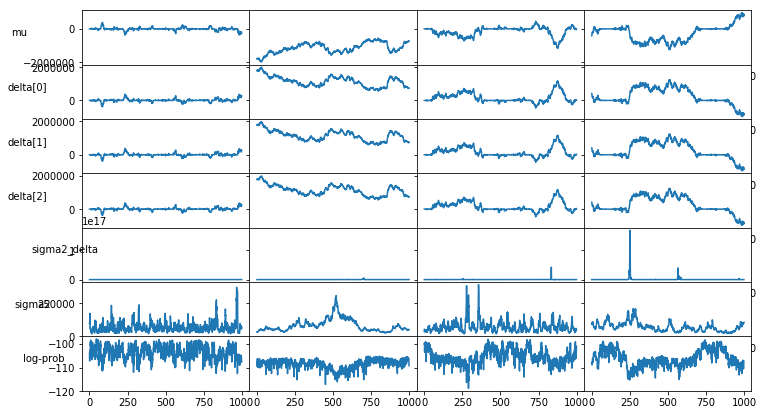

In [22]:
plot_traces(fit)

In [87]:
fit

Inference for Stan model: anon_model_1079643e344dce76944b371209644623.
4 chains, each with iter=20000; warmup=10000; thin=10; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]        2502.3    2.14 135.41 2231.4 2419.1 2502.1 2588.4 2766.6   4000    1.0
mu[1]        1565.8    1.74 108.91 1340.4 1500.1 1566.3 1635.1 1774.7   3919    1.0
mu[2]        1336.6    2.47 152.79 1030.6 1238.3 1335.0 1432.6 1642.9   3826    1.0
sigma2_delta 2.9e12  2.9e12 1.8e14  2.1e6  7.6e6  2.3e7  1.1e8  9.1e9   4000    1.0
sigma2        7.0e4  642.28  4.1e4  2.7e4  4.5e4  6.0e4  8.3e4  1.7e5   4000    1.0
lp__         -102.1    0.03    1.9 -106.8 -103.1 -101.7 -100.7 -99.64   4000    1.0

Samples were drawn using NUTS at Sat Apr 28 18:34:48 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


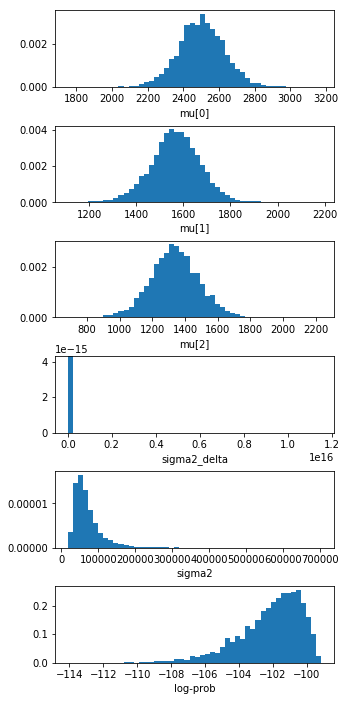

In [86]:
plot_posteriors(fit)

In [30]:
fit

Inference for Stan model: anon_model_c8c74a964d05665a9de91129601a711f.
4 chains, each with iter=20000; warmup=10000; thin=10; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu           1410.4  369.88  1.1e4 -1.7e4 -245.7 1665.9 2968.9  1.8e4    888    1.0
delta[0]     1090.8  369.61  1.1e4 -1.5e4 -494.7 811.91 2742.1  1.9e4    889    1.0
delta[1]     161.61  369.77  1.1e4 -1.6e4  -1401 -97.78 1819.6  1.8e4    888    1.0
delta[2]     -69.61   369.7  1.1e4 -1.6e4  -1640 -313.7 1573.6  1.8e4    889    1.0
sigma2_delta 2.2e15  2.2e15 1.4e17  2.8e5  4.1e6  3.1e7  3.7e8 8.7e10   4000    1.0
sigma2        6.9e4  654.31  3.9e4  2.7e4  4.4e4  6.0e4  8.3e4  1.7e5   3487    1.0
lp__         -112.8    0.05   2.53 -118.9 -114.2 -112.4 -110.9 -109.1   2391    1.0

Samples were drawn using NUTS at Sat Apr 28 17:04:04 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and R

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


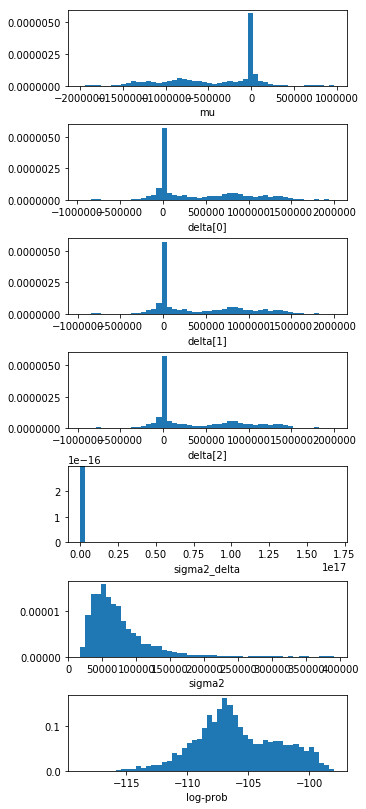

In [23]:
plot_posteriors(fit)

### Model for normalized data

In [37]:
y_raw = y_flat

In [38]:
m = np.mean(y_raw)
print(m)

1804.7692307692307


In [39]:
s = np.std(y_raw)
print(s)

520.182387222339


In [40]:
y = (y_raw - m)/s

In [43]:
(np.log(3.0) - np.log(0.3))/2

1.151292546497023

In [81]:
model_code = """
data {
    int<lower=1> G;  // number of groups
    int<lower=1> N;  // total number of data points
    int<lower=1, upper=G> label[N];  // group labels
    real y[N];
}
parameters{
    real delta[G];  // group means
    real<lower=0> Sigma;  // total variance
    real<lower=0, upper=1> gamma;  // sigma_delta^2 / Sigma^2
}
model {
    // priors
    target += lognormal_lpdf(Sigma | 0, 1.151);
    target += -log(gamma) - log(1 - gamma);
    
    // likelihoods
    for (g in 1:G){
        target += normal_lpdf(delta[g] | 0, sqrt(gamma)*Sigma);
    }
    for (j in 1:N){
        target += normal_lpdf(y[j] | delta[label[j]], sqrt(1 - gamma)*Sigma);
    }
}
"""
model = pystan.StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_abc54d61de5d0fffc88c59e644265f9b NOW.


In [45]:
data = {
    'G': G,
    'N': N,
    'label': labels_flat,
    'y': y
}

In [46]:
fit = model.sampling(data, seed=123456, iter=20_000, thin=10)

/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


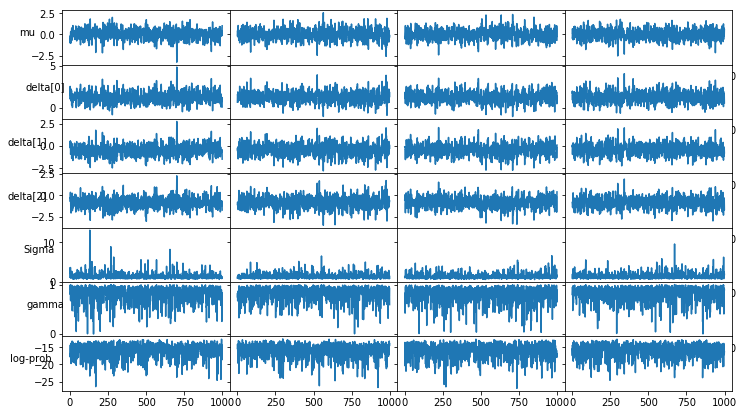

In [47]:
plot_traces(fit)

In [48]:
fit

Inference for Stan model: anon_model_51faf35cd5be129564173392e7b29923.
4 chains, each with iter=20000; warmup=10000; thin=10; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu       9.5e-3  9.9e-3   0.59  -1.19  -0.36 7.3e-3   0.39   1.19   3575    1.0
delta[0]   1.25    0.01   0.64   0.04   0.83   1.23   1.65   2.54   3520    1.0
delta[1]  -0.43    0.01   0.61  -1.68   -0.8  -0.42  -0.05   0.79   3682    1.0
delta[2]  -0.83    0.01   0.64  -2.13  -1.22  -0.82  -0.43    0.4   3680    1.0
Sigma      1.44    0.01   0.75   0.71   0.98   1.24   1.65   3.34   4000    1.0
gamma      0.81  2.7e-3   0.16   0.38   0.73   0.85   0.92   0.98   3439    1.0
lp__     -16.05    0.03   2.08 -21.16  -17.1 -15.64 -14.54 -13.22   4000    1.0

Samples were drawn using NUTS at Sat Apr 28 17:55:08 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduc

In [51]:
s * np.mean(fit.extract()['mu']) + m

1809.7252392889502

In [52]:
s * np.std(fit.extract()['mu'])

308.4609294384964

In [60]:
s * np.mean(np.sqrt(fit.extract()['gamma']) * fit.extract()['Sigma'])

685.3501562473448

In [61]:
s * np.mean(np.sqrt((1-fit.extract()['gamma'])) * fit.extract()['Sigma'])

260.31010541208275

In [62]:
s * np.std(np.sqrt(fit.extract()['gamma']) * fit.extract()['Sigma'])

409.1482881537556

In [63]:
s * np.std(np.sqrt((1-fit.extract()['gamma'])) * fit.extract()['Sigma'])

71.24696372701763

In [64]:
np.mean(fit.extract()['gamma'])

0.8056302577424022

In [65]:
np.std(fit.extract()['gamma'])

0.15949087183410496

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


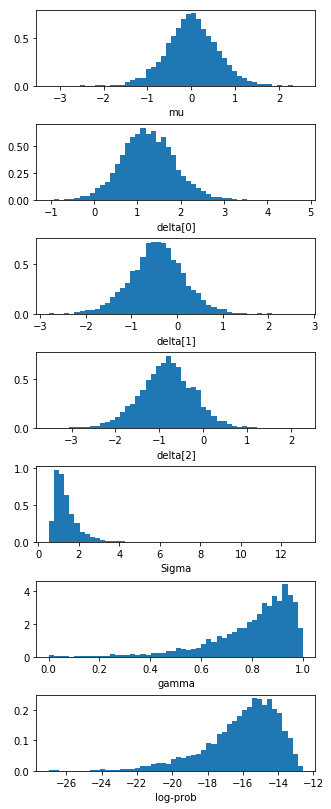

In [66]:
plot_posteriors(fit)

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
x = fit.extract()['mu']
y = fit.extract()['delta'][:, 0]

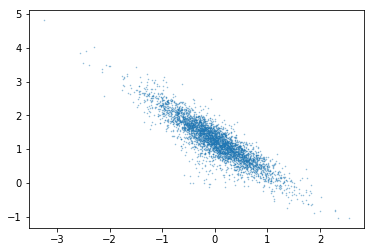

In [80]:
plt.plot(x,y, '.', ms=1, alpha=0.5)
plt.show()